In [1]:
from platform import python_version
print(python_version())

3.8.10


In [2]:
import sqlite3 as sl
import pandas as pd

db_con = sl.connect('/workspaces/vscode-ubuntu-container/resource/nse_india.db')
nifty50 = pd.read_sql('''
    SELECT i.Date, i.Close Price, p."P/E" PE, (i.Close / p."P/E") Earning 
    FROM HISTORICALINDICES i, HISTORICAL_PEPB p 
    WHERE i.Indices = p.Indices AND i.Date = p.Date AND i.Indices = 'NIFTY 50';
''', db_con)


In [3]:
nifty50.head()

,Date,Price,PE,Earning
0,1999-01-01,890.80,11.62,76.660929
1,1999-01-04,897.80,11.72,76.604096
2,1999-01-05,907.20,11.84,76.621622
3,1999-01-06,928.25,12.11,76.651528
4,1999-01-07,954.70,12.46,76.621188


<AxesSubplot:xlabel='Date'>

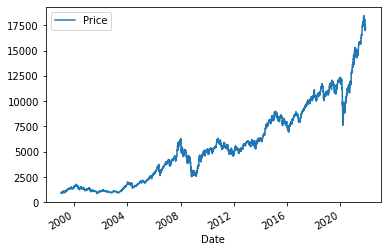

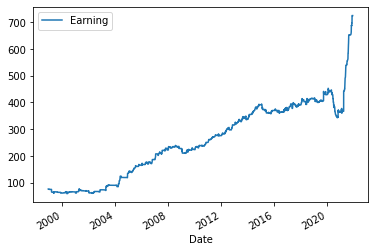

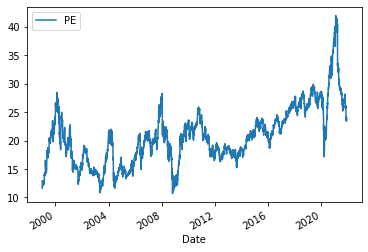

In [9]:
import matplotlib.pyplot as plt

nifty50.Date = pd.to_datetime(nifty50.Date)
nifty50.set_index('Date', inplace=True)
nifty50.plot(y=['Price'])
nifty50.plot(y=['Earning'])
nifty50.plot(y=['PE'])

In [18]:
import datetime
import numpy_financial as np

pd.set_option('max_row', None)

def select_sip_dates(navs, sip_day, start, end):
  dates = []
  for yr in range(start.year, end.year + 1):
    for mth in range(1, 13):
      temp = datetime.date(yr, mth, sip_day)
      max_date = navs.iloc[-1].name
      temp2 = temp + datetime.timedelta(days=7)
      sip_dt = max_date
      if temp2 < max_date.date():
        sip_dt = navs.loc[temp : temp + datetime.timedelta(days=7)].iloc[0].name
      dates.append(sip_dt)

  return dates

start_dt = datetime.date.fromisoformat('2000-01-01')
for i in range(0, 20):
  end_dt = start_dt + datetime.timedelta(days=366*15)
  _dates = select_sip_dates(nifty50, 5, start_dt, end_dt)

  # print('Start year:', _dates[0].year, 'End year:', _dates[-1].year)

  _outflow = nifty50.loc[_dates[:-1]].Close.multiply(-1).to_list()
  _units = nifty50.loc[_dates[:-1]].Close.count()
  _inflow = nifty50.loc[_dates[-1]].Close * _units
  _irr = np.irr(_outflow + [_inflow]) * 12
  print(_irr);
  # print("Annualized IRR: {:.2%}".format(_irr));
  start_dt = start_dt + datetime.timedelta(days=366)

# print(nifty50.loc[_dates].Close)



0.10738566138370853
0.0987731617997536
0.11110602736313702
0.10161217694505975
0.09891962841004442
0.09824109785663637
0.11434581481121153
0.10199782624021658
0.09155932175296044
0.08055688374060566
0.06865498661175895
0.058928945671179456
0.0493069084310358
0.03998749409749003
0.031731913557308644
0.025071377568041342
0.019460130873242498
0.014053714544693285
0.009780071014722225
0.006362033104422515
